In [9]:
import numpy as np 
import pandas as pd
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt

atlbusiness_data = pd.read_excel("data/Atlanta_Business_License_Records_2025.xlsx")
bus_ridership_data = pd.read_excel("data/MARTA_Bus_Ridership_2023_20250912.xlsx")
train_ridership_data = pd.read_excel("data/MARTA_Train_Ridership_2023_20250917.xlsx")

# make atl business_data into a geopandas file
atlbusiness_data["geometry"] = gpd.points_from_xy(atlbusiness_data["longitude"], atlbusiness_data["latitude"])
business_df_geo = gpd.GeoDataFrame(atlbusiness_data, crs='epsg:4326', geometry="geometry")
stops_gdf = gpd.read_file("data/MARTA_Stops_Shapefiles/MARTA_Stops.shp")

citylimit_gdf = gpd.read_file("data/ATL_CityLimit_Shapefiles/Official_Atlanta_City_Limits_-_Open_Data.shp")
# original crs is 6447
citylimit_gdf = citylimit_gdf.to_crs(epsg=4326)
for col in citylimit_gdf.columns:
    if pd.api.types.is_datetime64_any_dtype(citylimit_gdf[col]):
        citylimit_gdf[col] = citylimit_gdf[col].astype(str)

basemap = folium.Map(location=[33.753746, -84.386330], zoom_start=12)
#adding city limits to basemap
folium.GeoJson(
    citylimit_gdf,
    name='Atlanta City Limits'
).add_to(basemap)


#convert everything to EPSG:26916 for accurate distance measurements
business_df_geo = business_df_geo.to_crs(epsg=26916)
stops_gdf = stops_gdf.to_crs(epsg=26916)
citylimit_gdf_utm = citylimit_gdf.to_crs(epsg=26916)


#spatial join to get only businesses and stops within Atlanta
business_in_atlanta = business_df_geo[business_df_geo.within(citylimit_gdf_utm.unary_union)]
stops_in_atlanta = stops_gdf[stops_gdf.within(citylimit_gdf_utm.unary_union)]


#do another spacial join to determine distances between respective businesses and their closest stop
nearest = gpd.sjoin_nearest(
    business_in_atlanta, 
    stops_in_atlanta[["geometry"]], 
    how="left", 
    distance_col="dist_to_stop_m"
)

#determine mean differences
mean_dist = (
    nearest.groupby("disinvested_neighborhood")["dist_to_stop_m"]
    .mean()
    .reset_index()
)

print(mean_dist)
print(business_in_atlanta.crs) 
print(stops_in_atlanta.crs)

#are types of businesses more prevalent in disinvested neighborhoods

#check peak ridership dates, what insentivised these 
#check how much major sporting events/concerts affect peak ridership

#check top reviewed locations on google maps using web scraping,


#naics code analysis

top_types = (
    business_df_geo
    .groupby(["disinvested_neighborhood", "naics_name"])
    .size()
    .reset_index(name="count")
)

# Calculate percentages for comparison
top_types["percent"] = (
    top_types.groupby("disinvested_neighborhood")["count"]
    .transform(lambda x: x / x.sum() * 100)
)

# Look at top industries per group
top_types.sort_values(["disinvested_neighborhood", "count"], ascending=[True, False]).groupby("disinvested_neighborhood").head(10)

C:\Users\olese\AppData\Local\Temp\ipykernel_22644\750031130.py:39: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  business_in_atlanta = business_df_geo[business_df_geo.within(citylimit_gdf_utm.unary_union)]
C:\Users\olese\AppData\Local\Temp\ipykernel_22644\750031130.py:40: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  stops_in_atlanta = stops_gdf[stops_gdf.within(citylimit_gdf_utm.unary_union)]


KeyboardInterrupt: 

In [ ]:
citylimit_gdf.dtypes

In [ ]:
for col in citylimit_gdf.columns:
    if pd.api.types.is_datetime64_any_dtype(citylimit_gdf[col]):
        citylimit_gdf[col] = citylimit_gdf[col].astype(str)


basemap = folium.Map(location = [33.753746, -84.386330], zoom_start=12)

In [ ]:
basemap

In [ ]:
folium.GeoJson(
       citylimit_gdf,
       name='Atlanta City Limits'
   ).add_to(basemap)

KeyboardInterrupt: 

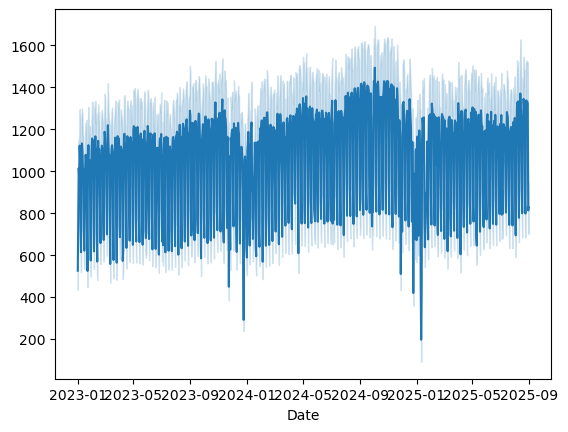

In [3]:
import seaborn as sns
sns.lineplot(data = bus_ridership_data, x="Date", y ="Total trips")

In [8]:
year_subset = bus_ridership_data.query("Date > pd.to_datetime('2023-01-01')")

daily_ridership = (
    year_subset.groupby("Date")["Total trips"]
    .sum()
    .reset_index()
)
daily_ridership.set_index("Date", inplace=True)
monthly = daily_ridership.resample("M")["Total trips"].sum().reset_index()
sns.lineplot(data = daily_ridership, x="Date", y ="Total trips")

UndefinedVariableError: name 'pd' is not defined